In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer

2024-10-21 14:55:56.252714: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 14:55:56.550757: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 14:55:57.754041: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 14:56:11.742235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [3]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [12]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape=(784,)))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu'))

autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))

autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.0063 - loss: 0.3478 - val_accuracy: 0.0110 - val_loss: 0.1681
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.0102 - loss: 0.1592 - val_accuracy: 0.0118 - val_loss: 0.1381
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.0127 - loss: 0.1363 - val_accuracy: 0.0153 - val_loss: 0.1260
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0125 - loss: 0.1250 - val_accuracy: 0.0106 - val_loss: 0.1167
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0114 - loss: 0.1167 - val_accuracy: 0.0112 - val_loss: 0.1114
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0109 - loss: 0.1121 - val_accuracy: 0.0116 - val_loss: 0.1078
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.0123 - loss: 0.1088 - val_accuracy: 0.0112 - val_loss: 0.1055
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.0113 - loss: 0.1060 - val_acc

In [15]:
orginal_dimension = Input(shape=(784,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(orginal_dimension, encoder_layer3(encoder_layer2(encoder_layer1(orginal_dimension))))

encoder.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
codified_images = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [21]:
decodified_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step


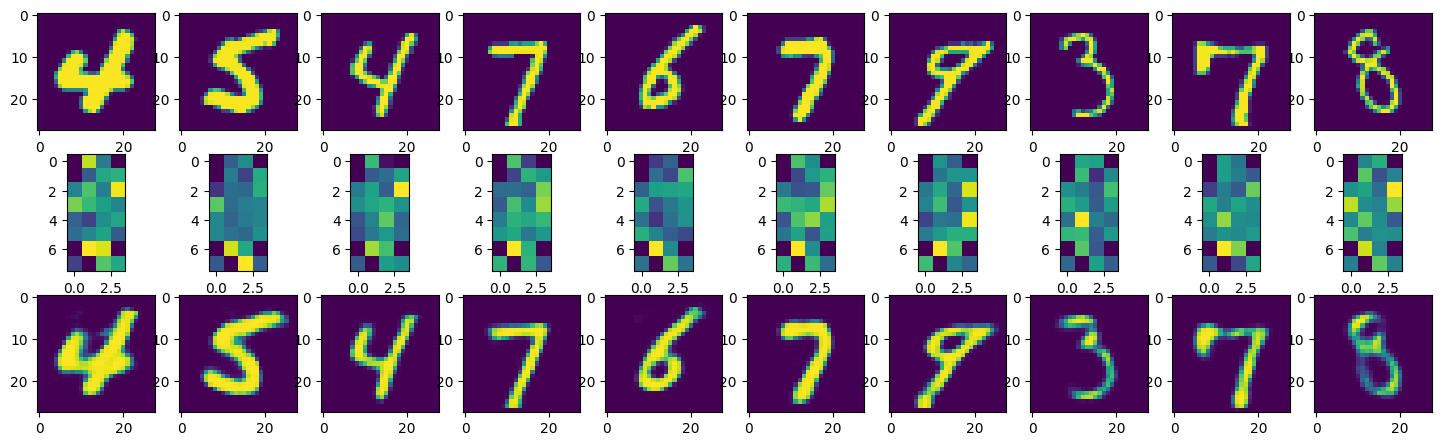

In [23]:
images_num = 10
test_images = np.random.randint(X_test.shape[0], size=images_num)
plt.figure(figsize=(18, 18))

for i, image_idx in enumerate(test_images):
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.xticks()
    plt.yticks()
    
    #Imagem Codificada
    eixo = plt.subplot(10, 10, i + 1 + images_num)
    plt.imshow(codified_images[image_idx].reshape(8, 4))
    plt.xticks()
    plt.yticks()
    
    #Imagem Orginal
    eixo = plt.subplot(10, 10, i + 1 + images_num * 2)
    plt.imshow(decodified_images[image_idx].reshape(28, 28))
    plt.xticks()
    plt.yticks()